### Additional Variable Information
- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter :	A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- team_no : Associated team number with the instance
- no_of_workers	: Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- targeted_productivity	: Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip :	Work in progress. Includes the number of unfinished items for products
- over_time	: Represents the amount of overtime by each team in minutes
- incentive	: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time	: The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- actual_productivity :	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
garment = pd.read_csv('../data/garments_worker_productivity.csv')
garment.head(10)
garment_edit = garment
garment_edit

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [3]:
garment_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Dealing with null values

In [38]:
garment_edit['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [41]:
garment_edit[garment_edit['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2,0.80,22.52,1416,6840,113,0.0,0,0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,0,1200,0,0.0,0,0,10,0.989000
500,1/29/2015,Quarter5,sewing,Thursday,3,0.80,22.52,1287,6840,100,0.0,0,0,57,0.950186
501,1/29/2015,Quarter5,sewing,Thursday,4,0.80,22.52,1444,6900,88,0.0,0,0,58,0.900800
502,1/29/2015,Quarter5,sewing,Thursday,10,0.80,22.52,1088,6720,88,0.0,0,0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,0,1200,0,0.0,0,0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,0,960,0,0.0,0,0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,0,960,0,0.0,0,0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,0,1200,0,0.0,0,0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,0,1200,0,0.0,0,0,10,0.853667


In [8]:
# checking the null value counts
missing_values = garment_edit.isnull().sum()
missing_percentage = (missing_values / len(garment_edit)) * 100

for p, r in zip(garment_edit.columns, missing_percentage):
    print('{:25}{:.2f}'.format(p, r))

date                     0.00
quarter                  0.00
department               0.00
day                      0.00
team                     0.00
targeted_productivity    0.00
smv                      0.00
wip                      42.27
over_time                0.00
incentive                0.00
idle_time                0.00
idle_men                 0.00
no_of_style_change       0.00
no_of_workers            0.00
actual_productivity      0.00


In [10]:
size = garment_edit[garment_edit['over_time'] == 0].department.value_counts()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [11]:
garment_edit[garment_edit['over_time'] == 0].department.value_counts()

department
sweing       21
finishing    10
Name: count, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

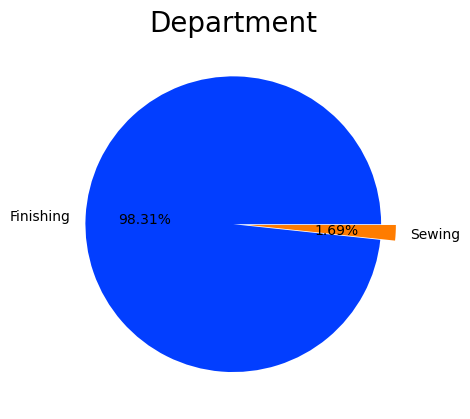

In [6]:
size = garment_edit[garment_edit['incentive'] == 0].department.value_counts()
labels = 'Finishing', 'Sewing'
explode = [0, 0.1]

plt.pie(size, colors = sns.color_palette('bright'),labels = labels,autopct = '%.2f%%', explode=explode)
plt.title('', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

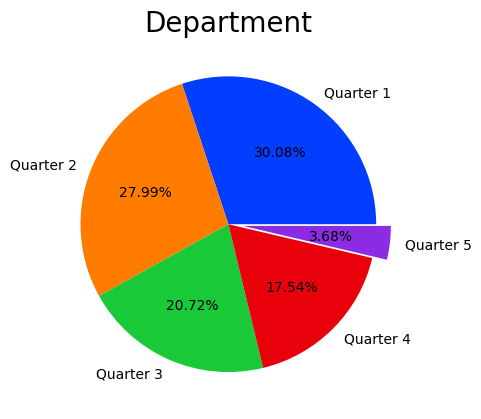

In [5]:
size = garment_edit.quarter.value_counts()
labels = 'Quarter 1', 'Quarter 2','Quarter 3','Quarter 4','Quarter 5'
explode = [0,0,0,0,0.1]

plt.pie(size, colors = sns.color_palette('bright'), labels = labels,autopct = '%.2f%%',explode=explode)
plt.title('Department', fontsize = 20)
plt.axis('off')

In [4]:
garment_edit.quarter.value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

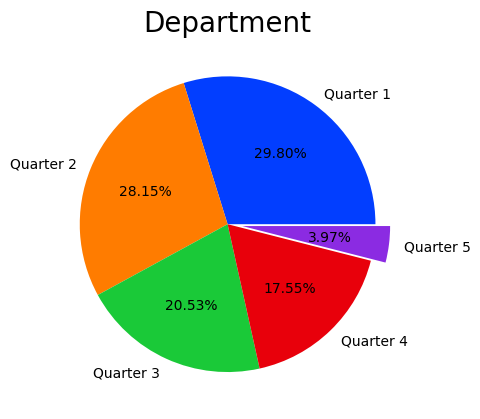

In [37]:
size = garment_edit[garment_edit['incentive'] == 0].quarter.value_counts()
labels = 'Quarter 1', 'Quarter 2','Quarter 3','Quarter 4','Quarter 5'
explode = [0,0,0,0,0.1]

plt.pie(size, colors = sns.color_palette('bright'), labels = labels,autopct = '%.2f%%',explode=explode)
plt.title('Department', fontsize = 20)
plt.axis('off')

In [34]:
garment_edit[garment_edit['incentive'] == 0].quarter.value_counts()

quarter
Quarter1    180
Quarter2    170
Quarter4    124
Quarter3    106
Quarter5     24
Name: count, dtype: int64

In [28]:
garment_edit[garment_edit['incentive'] == 0].department.value_counts()

department
finishing    496
sewing       108
Name: count, dtype: int64

In [9]:
print('Maximum of wip: ', garment_edit['wip'].max())
print('Minimum of wip: ', garment_edit['wip'].min())

Maximum of wip:  23122.0
Minimum of wip:  7.0


In [108]:
garment_edit[garment_edit['wip'] == 23122.0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
569,2/2/2015,Quarter1,sweing,Monday,4,0.8,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393


In [16]:
# checking the types of the departments
garment_edit['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [15]:
## since there are some typos in the department types, edit the department types
garment_edit = garment_edit.replace(['finishing '], ['finishing']) 
garment_edit = garment_edit.replace(['sweing'], ['sewing']) 
garment_edit.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [17]:
# checking the null values with the department types
print("Number of null values in the sewing department wip: ", garment_edit[garment_edit['department'] == 'sewing'].wip.isnull().sum())
print("Number of null values in the finishing department wip: ", garment_edit[garment_edit['department'] == 'finishing'].wip.isnull().sum())

Number of null values in the sewing department wip:  0
Number of null values in the finishing department wip:  506


This shows that the null values are present due to the type of the department. All the finishing department WIP values set as NaN since there is no work in progress after finishing the product. Instead of NaN we can replace '0' indicating that there are no work in progress products. Other than that there are no null values.

In [18]:
# Replace null values with 0
garment_edit['wip'].fillna(0, inplace = True)

In [19]:
garment_edit.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [20]:
## change the type of wip to int
garment_edit['wip'] = garment_edit['wip'].astype(int)

In [21]:
# round the number of workers 
# garment_edit['no_of_workers'] = garment_edit['no_of_workers'].round() # this will round up 30.5 to 31

garment_edit['no_of_workers'] = garment_edit['no_of_workers'].apply(lambda x: math.ceil(x))
garment_edit['no_of_workers'] = garment_edit['no_of_workers'].astype(int)

In [117]:
garment_edit.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
5,1/1/2015,Quarter1,sewing,Thursday,7,0.80,25.90,984,6720,38,0.0,0,0,56,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,0,960,0,0.0,0,0,8,0.755167
7,1/1/2015,Quarter1,sewing,Thursday,3,0.75,28.08,795,6900,45,0.0,0,0,58,0.753683
8,1/1/2015,Quarter1,sewing,Thursday,2,0.75,19.87,733,6000,34,0.0,0,0,55,0.753098
9,1/1/2015,Quarter1,sewing,Thursday,1,0.75,28.08,681,6900,45,0.0,0,0,58,0.750428


In [124]:
garment_edit[garment_edit['team'] >= 11]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
18,1/1/2015,Quarter1,finishing,Thursday,11,0.70,4.15,0,1440,0,0.0,0,0,12,0.436326
20,1/3/2015,Quarter1,finishing,Saturday,11,0.75,2.90,0,5640,0,0.0,0,0,17,0.987880
27,1/3/2015,Quarter1,sewing,Saturday,12,0.80,26.16,844,7080,63,0.0,0,0,59,0.800319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,3/10/2015,Quarter2,finishing,Tuesday,11,0.80,2.90,0,960,0,0.0,0,0,8,0.758229
1173,3/11/2015,Quarter2,finishing,Wednesday,12,0.80,4.60,0,2160,0,0.0,0,0,9,0.922840
1174,3/11/2015,Quarter2,finishing,Wednesday,11,0.80,2.90,0,2400,0,0.0,0,0,10,0.874028
1178,3/11/2015,Quarter2,sewing,Wednesday,12,0.80,15.26,470,4080,63,0.0,0,0,34,0.800402


Text(0.5, 1.0, 'smv')

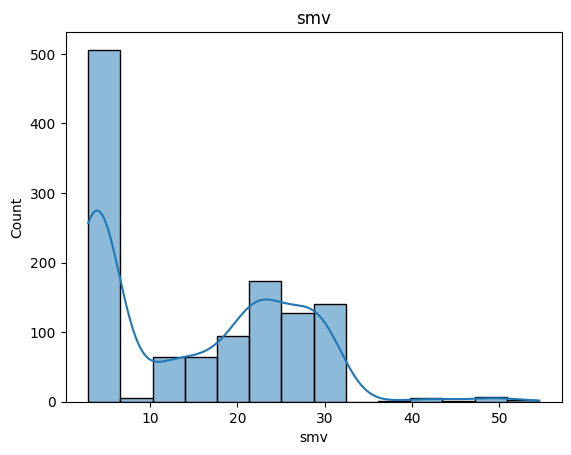

In [53]:
ax = sns.histplot(garment_edit.smv, kde = True)
ax.set_title("smv")

Text(0.5, 1.0, 'Work in Progress')

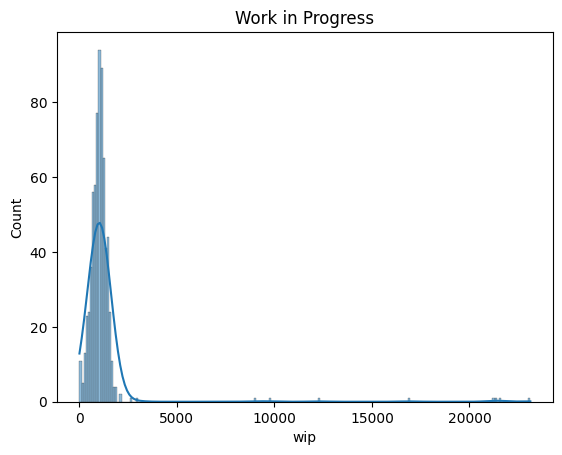

In [54]:
ax = sns.histplot(garment_edit.wip, kde = True)
ax.set_title("Work in Progress")

In [55]:
print(garment_edit['wip'].max())

23122.0


In [56]:
garment_edit[garment_edit['wip'] == 23122.0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
569,2/2/2015,Quarter1,sweing,Monday,4,0.8,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393


In [57]:
garment_edit[garment_edit['date'] == '2/2/2015']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
562,2/2/2015,Quarter1,finishing,Monday,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.994271
563,2/2/2015,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,2/2/2015,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,2/2/2015,Quarter1,sweing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
566,2/2/2015,Quarter1,finishing,Monday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
567,2/2/2015,Quarter1,finishing,Monday,4,0.80,4.30,NaN,1440,0,0.0,0,0,12.0,0.809236
568,2/2/2015,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
569,2/2/2015,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
570,2/2/2015,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963


In [58]:
garment_edit[garment_edit['department'] == 'sewing'].isnull().sum()

date                     0.0
quarter                  0.0
department               0.0
day                      0.0
team                     0.0
targeted_productivity    0.0
smv                      0.0
wip                      0.0
over_time                0.0
incentive                0.0
idle_time                0.0
idle_men                 0.0
no_of_style_change       0.0
no_of_workers            0.0
actual_productivity      0.0
dtype: float64

In [59]:
garment_edit[garment_edit['department'] == 'finishing'].isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      249
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [60]:
garment_edit.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [61]:
garment_edit[garment_edit['department'] == 'sewing'].team.value_counts()

Series([], Name: count, dtype: int64)

In [62]:
garment_edit[garment_edit['department'] == 'finishing'].team.value_counts()

team
2     28
12    27
8     25
9     25
1     23
6     22
4     20
3     19
7     18
10    17
5     15
11    10
Name: count, dtype: int64

In [63]:
garment_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [64]:
garment_edit['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [65]:
garment_edit = garment_edit.replace(['finishing '], ['finishing']) 
garment_edit = garment_edit.replace(['sweing'], ['sewing']) 
garment_edit.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

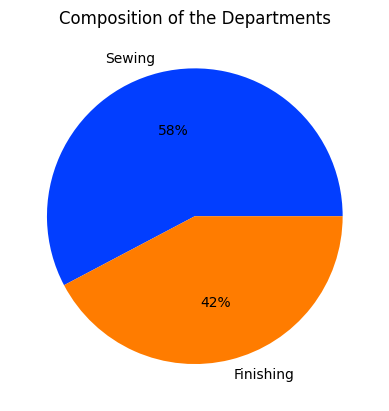

In [66]:
# importing libraries 
import matplotlib.pyplot as plt 
import seaborn as sns
  
# declaring data 
data = garment_edit['department'].value_counts()
keys = ['Sewing', 'Finishing'] 
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
# palette_color = sns.light_palette("seagreen") 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
plt.title('Composition of the Departments')
  
# displaying chart 
plt.show() 

In [67]:
# missing values
# Check for missing values
missing_values = garment_edit.isnull().sum()
# print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(garment_edit)) * 100

for p, r in zip(garment_edit.columns, missing_percentage):
    print('{:25}{:.2f}'.format(p, r))

date                     0.00
quarter                  0.00
department               0.00
day                      0.00
team                     0.00
targeted_productivity    0.00
smv                      0.00
wip                      42.27
over_time                0.00
incentive                0.00
idle_time                0.00
idle_men                 0.00
no_of_style_change       0.00
no_of_workers            0.00
actual_productivity      0.00


Text(0.5, 1.0, 'Targeted Productivity')

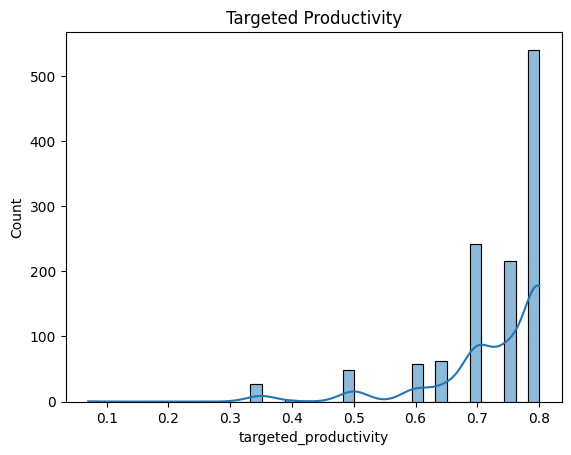

In [68]:
import seaborn as sns
ax = sns.histplot(garment_edit.targeted_productivity, kde = True)
ax.set_title("Targeted Productivity")

Text(0.5, 1.0, 'Actual Productivity')

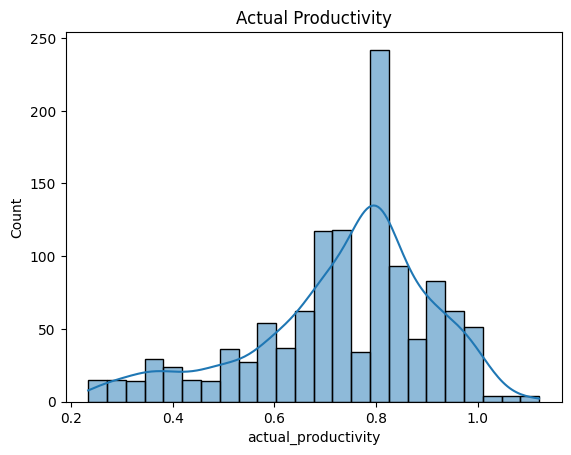

In [69]:
import seaborn as sns
ax = sns.histplot(garment_edit.actual_productivity, kde=True)
ax.set_title("Actual Productivity")

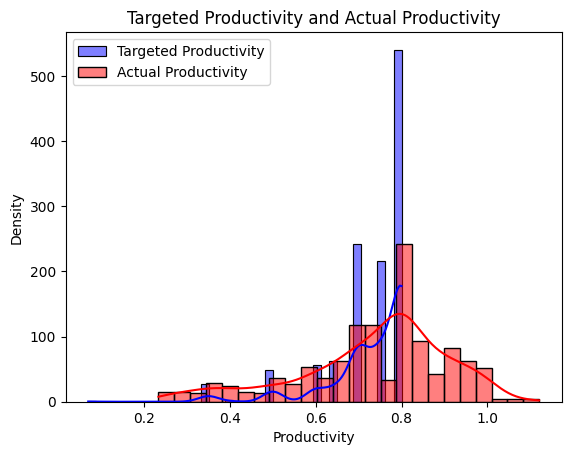

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax = sns.distplot(garment.targeted_productivity)
# ax.set_title("Targeted Productivity and Actual Productivity")

sns.histplot(garment_edit.targeted_productivity, color='blue', alpha=0.5, kde=True, label='Targeted Productivity')
sns.histplot(garment_edit.actual_productivity, color='red', alpha=0.5, kde=True, label='Actual Productivity')

# Adding labels and legend
plt.xlabel('Productivity')
plt.title('Targeted Productivity and Actual Productivity')
plt.ylabel('Density')
plt.legend()

plt.show()

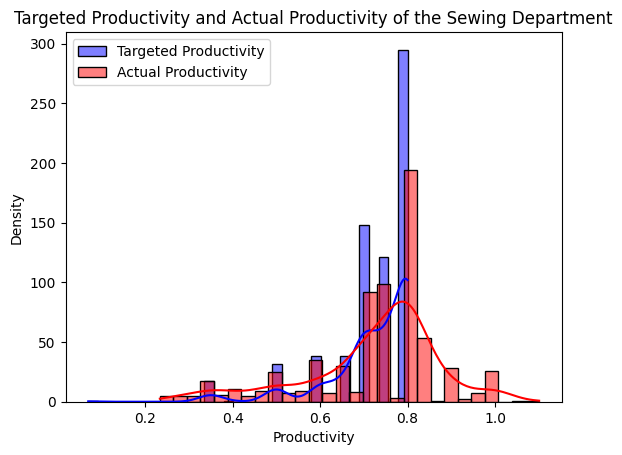

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax = sns.distplot(garment.targeted_productivity)
# ax.set_title("Targeted Productivity and Actual Productivity")

sns.histplot(garment_edit[garment_edit['department'] == 'sewing'].targeted_productivity, color='blue', alpha=0.5, kde=True, label='Targeted Productivity')
sns.histplot(garment_edit[garment_edit['department'] == 'sewing'].actual_productivity, color='red', alpha=0.5, kde=True, label='Actual Productivity')

# Adding labels and legend
plt.xlabel('Productivity')
plt.title('Targeted Productivity and Actual Productivity of the Sewing Department')
plt.ylabel('Density')
plt.legend()

plt.show()

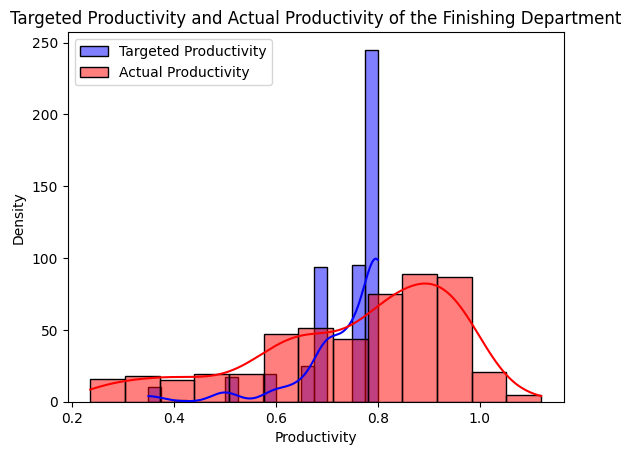

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax = sns.distplot(garment.targeted_productivity)
# ax.set_title("Targeted Productivity and Actual Productivity")

sns.histplot(data=garment_edit[garment_edit['department'] == 'finishing'].targeted_productivity, color='blue', alpha=0.5, kde=True, label='Targeted Productivity')
sns.histplot(data=garment_edit[garment_edit['department'] == 'finishing'].actual_productivity, color='red', alpha=0.5, kde=True, label='Actual Productivity')

# Adding labels and legend
plt.xlabel('Productivity')
plt.title('Targeted Productivity and Actual Productivity of the Finishing Department')
plt.ylabel('Density')
plt.legend()

plt.show()

In [73]:
garment_edit['team'] = garment_edit['team'].astype(str)

In [74]:
garment.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


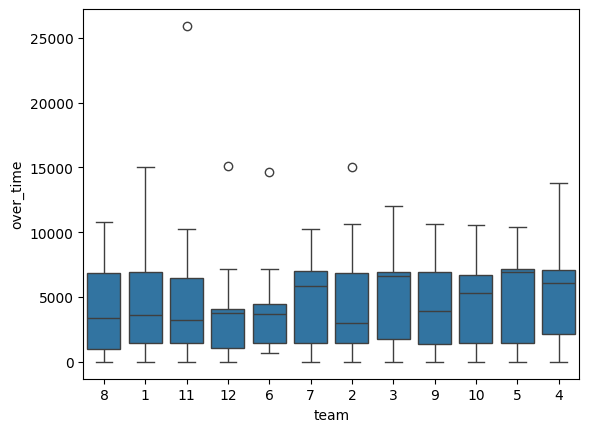

In [75]:
sns.boxplot(x='team',y='over_time',data=garment_edit)
plt.show()

In [76]:
import numpy as np

corr=garment_edit.corr()
mask=np.zeros(corr.shape,dtype=bool)
mask[np.triu_indices(len(mask))]=True

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='crest',square=True,mask=mask,linecolor='white',linewidths=1)

ValueError: could not convert string to float: '1/1/2015'

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(numeric_garment)

C:\Users\User1\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
garment.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
numeric_garment = garment_edit[['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers','targeted_productivity', 'actual_productivity']]